In [2]:
#!pip install optbinning

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you'll have protobuf 4.21.12 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you'll have protobuf 4.21.12 which is incompatible.


  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


In [1]:
import pandas as pd
import numpy as np

In [2]:
from optbinning import BinningProcess
from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

In [3]:
df = pd.read_csv('data/heloc_dataset_v1.csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [5]:
variable_names = list(df.columns[1:])
variable_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance']

In [6]:
X = df[variable_names]
X

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55,144,4,84,20,3,0,83,2,3,...,43,0,0,0,33,-8,8,1,1,69
1,61,58,15,41,2,4,4,100,-7,0,...,67,0,0,0,0,-8,0,-8,-8,0
2,67,66,5,24,9,0,0,100,-7,7,...,44,0,4,4,53,66,4,2,1,86
3,66,169,1,73,28,1,1,93,76,6,...,57,0,5,4,72,83,6,4,3,91
4,81,333,27,132,12,0,0,100,-7,7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73,131,5,57,21,0,0,95,80,6,...,19,7,0,0,26,-8,5,2,0,100
10455,65,147,39,68,11,0,0,92,28,6,...,42,1,1,1,86,53,2,2,1,80
10456,74,129,6,64,18,1,1,100,-7,6,...,33,3,4,4,6,-8,5,-8,0,56
10457,72,234,12,113,42,2,2,96,35,6,...,20,6,0,0,19,-8,4,1,0,38


### Target 정의
- 불량으로 정의된 건은 1로, 그 외 우량 건은 0으로 설정

In [7]:
y = df["RiskPerformance"].values
y 

mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

In [8]:
# 불량률 출력
y.sum() / len(y)

0.5219428243617936

In [9]:
selection_criteria = {"iv": {"min": 0.02, "max": 1},
                        "quality_score":{"min": 0.01}}

special_codes = [-9, -8, -7]

# Special Value
# -9 No Bureau Record or No Investigation
# -8 No Usable/Valid Trades or Inquiries
# -7 Condition not Met (e.g. No Inquiries, No Delinquencies) 

In [107]:
binning_process = BinningProcess(variable_names, special_codes=special_codes,
                                 selection_criteria=selection_criteria)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
estimator = LogisticRegression(solver="lbfgs") # lbfgs : 멀티클래스의 분류 모델에 쓰임 (L1정규화)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
test_estimator = RandomForestClassifier(n_estimators=5, random_state=0)

In [135]:
scorecard = Scorecard(binning_process = binning_process,
                     estimator = test_estimator, scaling_method="pdo_odds",
                     scaling_method_params={"pdo":50, "odds":1, "scorecard_points":500})

In [136]:
scorecard.fit(X, y, show_digits=4)

C:\ProgramData\Anaconda3\lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


RuntimeError: The classifier does not expose "coef_" attribute.

In [137]:
scorecard.table(style="summary")

NotFittedError: This Scorecard instance is not fitted yet. Call 'fit' with appropriate arguments.

#### Scaling Method 1 = "pdo_odds"
- pdo, odds, base point 설정
- base point 기준으로 pdo 값이 증가할때마다 odds 값이 2배씩 증가하도록 scorecard 만듬

In [110]:
scorecard = Scorecard(binning_process = binning_process,
                     estimator = estimator, scaling_method="pdo_odds",
                     scaling_method_params={"pdo":50, "odds":1, "scorecard_points":500})

In [111]:
scorecard.fit(X, y, show_digits=4)

C:\ProgramData\Anaconda3\lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


Scorecard(binning_process=BinningProcess(max_bin_size=0.02,
                                         selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.02},
                                                             'quality_score': {'min': 0.01}},
                                         special_codes=[-9, -8, -7],
                                         variable_names=['ExternalRiskEstimate',
                                                         'MSinceOldestTradeOpen',
                                                         'MSinceMostRecentTradeOpen',
                                                         'AverageMInFile',
                                                         'NumSatisfactoryTrades',
                                                         'NumTrades60Ever2DerogPubRec',
                                                         'NumTrades90Ever2DerogPubRec...
                                                         'MSinceMostRecentInqexcl7days',
                                                         'NumInqLast6M',
                                                         'NumInqLast6Mexcl7days',
                                                         'NetFractionRevolvingBurden',
                                                         'NetFractionInstallBurden',
                                                         'NumRevolvingTradesWBalance',
                                                         'NumInstallTradesWBalance',
                                                         'NumBank2NatlTradesWHighUtilization',
                                                         'PercentTradesWBalance']),
          estimator=LogisticRegression(), scaling_method='pdo_odds',
          scaling_method_params={'odds': 1, 'pdo': 50, 'scorecard_points': 500})

In [112]:
scorecard.information(print_level=2)

optbinning (Version 0.17.2)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                  pdo_odds   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  10459
    Number of variables                   23
    Target type                       binary

    Number of numerical                   23
    Number of categorical                  0
    Number of selected                    19

  Timing
    Total time                          1.07 sec
    Binning process                     0.97 sec   ( 90.58%)
    Estimator                           0.03 sec   (  3.12%

In [113]:
# style 1
scorecard.table(style="summary")

,Variable,Bin,Points
0,ExternalRiskEstimate,"(-inf, 59.5000)",-12.176429
1,ExternalRiskEstimate,"[59.5000, 63.5000)",-3.448084
2,ExternalRiskEstimate,"[63.5000, 65.5000)",5.744872
3,ExternalRiskEstimate,"[65.5000, 67.5000)",8.057113
4,ExternalRiskEstimate,"[67.5000, 70.5000)",15.999494
...,...,...,...
8,PercentTradesWBalance,"[80.5000, 87.5000)",25.529162
9,PercentTradesWBalance,"[87.5000, 98.0000)",25.132661
10,PercentTradesWBalance,"[98.0000, inf)",24.995385
11,PercentTradesWBalance,Special,26.128404


In [16]:
# style 1
scorecard.table(style="summary")

,Variable,Bin,Points
0,ExternalRiskEstimate,"(-inf, 59.5000)",-12.176429
1,ExternalRiskEstimate,"[59.5000, 63.5000)",-3.448084
2,ExternalRiskEstimate,"[63.5000, 65.5000)",5.744872
3,ExternalRiskEstimate,"[65.5000, 67.5000)",8.057113
4,ExternalRiskEstimate,"[67.5000, 70.5000)",15.999494
...,...,...,...
8,PercentTradesWBalance,"[80.5000, 87.5000)",25.529162
9,PercentTradesWBalance,"[87.5000, 98.0000)",25.132661
10,PercentTradesWBalance,"[98.0000, inf)",24.995385
11,PercentTradesWBalance,Special,26.128404


In [17]:
# style 2
scorecard.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,ExternalRiskEstimate,0,"(-inf, 59.5000)",1081,0.103356,166,915,0.846438,-1.619109,0.217629,0.024574,-0.327969,-12.176429
1,ExternalRiskEstimate,1,"[59.5000, 63.5000)",1097,0.104886,228,869,0.792160,-1.250170,0.142003,0.016678,-0.327969,-3.448084
2,ExternalRiskEstimate,2,"[63.5000, 65.5000)",681,0.065111,190,491,0.720999,-0.861592,0.044754,0.005427,-0.327969,5.744872
3,ExternalRiskEstimate,3,"[65.5000, 67.5000)",652,0.062339,195,457,0.700920,-0.763856,0.034156,0.004169,-0.327969,8.057113
4,ExternalRiskEstimate,4,"[67.5000, 70.5000)",1038,0.099245,388,650,0.626204,-0.428139,0.017755,0.002203,-0.327969,15.999494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,PercentTradesWBalance,8,"[80.5000, 87.5000)",797,0.076202,283,514,0.644918,-0.508949,0.019114,0.002364,-0.016322,25.529162
9,PercentTradesWBalance,9,"[87.5000, 98.0000)",652,0.062339,184,468,0.717791,-0.845705,0.041380,0.005024,-0.016322,25.132661
10,PercentTradesWBalance,10,"[98.0000, inf)",1277,0.122096,331,946,0.740799,-0.962296,0.103054,0.012407,-0.016322,24.995385
11,PercentTradesWBalance,11,Special,606,0.057941,269,337,0.556106,-0.137544,0.001091,0.000136,-0.016322,26.128404


#### Scaling Method 2 = "min_max"
- min, max 값 설정
- scale 값들을 Min-Max Normalization 을 이용하여 Score를 MIn~ Max 값 사이로 변환시켜줌

In [18]:
scorecard2 = Scorecard(binning_process = binning_process,
                     estimator = estimator, scaling_method="min_max",
                     scaling_method_params={"min":1, "max":1000})

In [19]:
scorecard2.fit(X, y, show_digits=4)

C:\ProgramData\Anaconda3\lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.02},
                                                             'quality_score': {'min': 0.01}},
                                         special_codes=[-9, -8, -7],
                                         variable_names=['ExternalRiskEstimate',
                                                         'MSinceOldestTradeOpen',
                                                         'MSinceMostRecentTradeOpen',
                                                         'AverageMInFile',
                                                         'NumSatisfactoryTrades',
                                                         'NumTrades60Ever2DerogPubRec',
                                                         'NumTrades90Ever2DerogPubRec',
                                                         'PercentTradesNe...
                                                         'PercentInstallTrades',
                                                         'MSinceMostRecentInqexcl7days',
                                                         'NumInqLast6M',
                                                         'NumInqLast6Mexcl7days',
                                                         'NetFractionRevolvingBurden',
                                                         'NetFractionInstallBurden',
                                                         'NumRevolvingTradesWBalance',
                                                         'NumInstallTradesWBalance',
                                                         'NumBank2NatlTradesWHighUtilization',
                                                         'PercentTradesWBalance']),
          estimator=LogisticRegression(), scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 1})

In [20]:
scorecard2.information(print_level=2)

optbinning (Version 0.17.2)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                  10459
    Number of variables                   23
    Target type                       binary

    Number of numerical                   23
    Number of categorical                  0
    Number of selected                    19

  Timing
    Total time                          1.04 sec
    Binning process                     0.95 sec   ( 91.01%)
    Estimator                           0.03 sec   (  2.95%

In [21]:
# style 1
scorecard2.table(style="summary")

,Variable,Bin,Points
0,ExternalRiskEstimate,"(-inf, 59.5000)",-18.892402
1,ExternalRiskEstimate,"[59.5000, 63.5000)",-7.560467
2,ExternalRiskEstimate,"[63.5000, 65.5000)",4.374668
3,ExternalRiskEstimate,"[65.5000, 67.5000)",7.376631
4,ExternalRiskEstimate,"[67.5000, 70.5000)",17.688154
...,...,...,...
8,PercentTradesWBalance,"[80.5000, 87.5000)",30.060439
9,PercentTradesWBalance,"[87.5000, 98.0000)",29.545666
10,PercentTradesWBalance,"[98.0000, inf)",29.367441
11,PercentTradesWBalance,Special,30.838430


In [22]:
# style 2
scorecard2.table(style="detailed")

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,ExternalRiskEstimate,0,"(-inf, 59.5000)",1081,0.103356,166,915,0.846438,-1.619109,0.217629,0.024574,-0.327969,-18.892402
1,ExternalRiskEstimate,1,"[59.5000, 63.5000)",1097,0.104886,228,869,0.792160,-1.250170,0.142003,0.016678,-0.327969,-7.560467
2,ExternalRiskEstimate,2,"[63.5000, 65.5000)",681,0.065111,190,491,0.720999,-0.861592,0.044754,0.005427,-0.327969,4.374668
3,ExternalRiskEstimate,3,"[65.5000, 67.5000)",652,0.062339,195,457,0.700920,-0.763856,0.034156,0.004169,-0.327969,7.376631
4,ExternalRiskEstimate,4,"[67.5000, 70.5000)",1038,0.099245,388,650,0.626204,-0.428139,0.017755,0.002203,-0.327969,17.688154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,PercentTradesWBalance,8,"[80.5000, 87.5000)",797,0.076202,283,514,0.644918,-0.508949,0.019114,0.002364,-0.016322,30.060439
9,PercentTradesWBalance,9,"[87.5000, 98.0000)",652,0.062339,184,468,0.717791,-0.845705,0.041380,0.005024,-0.016322,29.545666
10,PercentTradesWBalance,10,"[98.0000, inf)",1277,0.122096,331,946,0.740799,-0.962296,0.103054,0.012407,-0.016322,29.367441
11,PercentTradesWBalance,11,Special,606,0.057941,269,337,0.556106,-0.137544,0.001091,0.000136,-0.016322,30.838430


#### score 최소값, 최대값 출력

In [23]:
sc1 = scorecard.table(style="summary")
sc1.groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()

Points  amin     45.901213
        amax    815.374112
dtype: float64

In [24]:
sc2 = scorecard2.table(style="summary")
sc2.groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()

Points  amin       1.0
        amax    1000.0
dtype: float64

### 각종 성능지표 출력

In [25]:
y_pred = scorecard.predict_proba(X)[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


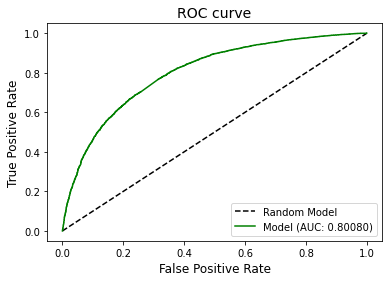

In [26]:
plot_auc_roc(y, y_pred)

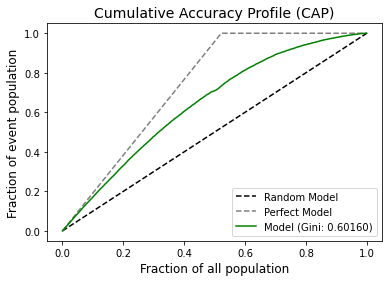

In [27]:
plot_cap(y, y_pred)

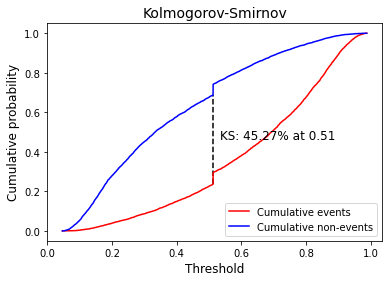

In [28]:
plot_ks(y, y_pred)

### 우불량 분포

In [29]:
import matplotlib.pyplot as plt

In [30]:
score = scorecard.score(X)

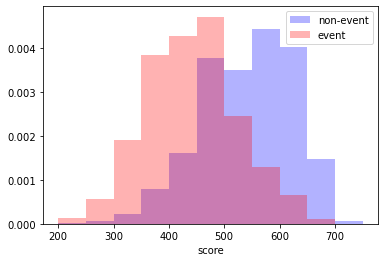

In [31]:
mask = y == 0
bins = np.arange(200,800,50) 
plt.hist(score[mask], bins, label="non-event", color="b", alpha=0.3, density = True)
plt.hist(score[~mask], bins, label="event", color="r", alpha=0.3, density = True)
plt.xlabel("score")
plt.legend()
plt.show()

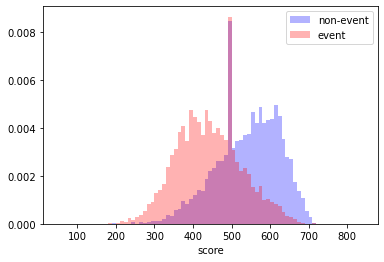

In [32]:
mask = y == 0
bins = np.arange(50,850,10) 
plt.hist(score[mask], bins, label="non-event", color="b", alpha=0.3, density = True)
plt.hist(score[~mask], bins, label="event", color="r", alpha=0.3, density = True)
plt.xlabel("score")
plt.legend()
plt.show()

In [33]:
score2 = scorecard2.score(X)

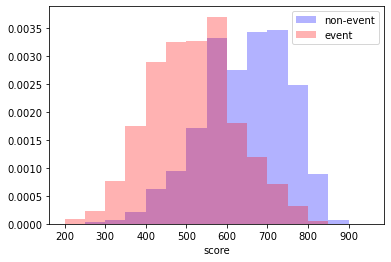

In [34]:
mask = y == 0
bins = np.arange(200,1000,50) 
plt.hist(score2[mask], bins, label="non-event", color="b", alpha=0.3, density = True)
plt.hist(score2[~mask], bins, label="event", color="r", alpha=0.3, density = True)
plt.xlabel("score")
plt.legend()
plt.show()

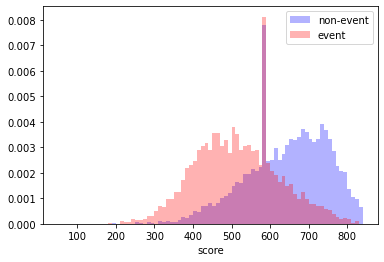

In [35]:
mask = y == 0
bins = np.arange(50,850,10) 
plt.hist(score2[mask], bins, label="non-event", color="b", alpha=0.3, density = True)
plt.hist(score2[~mask], bins, label="event", color="r", alpha=0.3, density = True)
plt.xlabel("score")
plt.legend()
plt.show()

### 성능지표 확인

In [36]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [37]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Compute the mean absolute percentage error (MAPE).
    """
    return np.abs((y_true - y_pred) / y_true).mean()


def median_absolute_percentage_error(y_true, y_pred):
    """Compute the median absolute percentage error (MdAPE).
    """
    return np.median(np.abs((y_true - y_pred) / y_true))


def mean_percentage_error(y_true, y_pred):
    """Compute the mean percentage error (MPE).
    """
    return ((y_true - y_pred) / y_true).mean()


def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Compute the symmetric mean absolute percentage error (SMAPE).
    """
    e = np.abs(y_true - y_pred)
    return (e / (np.abs(y_true) + np.abs(y_pred))).mean()


def symmetric_median_absolute_percentage_error(y_true, y_pred):
    """Compute the symmetric median absolute percentage error (SMdAPE).
    """
    e = np.abs(y_true - y_pred)
    return np.median(e / (np.abs(y_true) + np.abs(y_pred)))

def regression_metrics(y_true, y_pred):
    """Compute regression metrics.
    """

    # Explained variance
    variance = explained_variance_score(y_true, y_pred)

    # Mean absolute error
    mae = mean_absolute_error(y_true, y_pred)

    # Mean squared error
    mse = mean_squared_error(y_true, y_pred)

    # Median absolute error
    median_ae = median_absolute_error(y_true, y_pred)

    # R^2 score
    r2 = r2_score(y_true, y_pred)

    # Mean absolute percentage error
    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Mean percentage error
    mpe = mean_percentage_error(y_true, y_pred)

    # Symmetric mean absolute percentage error
    smape = symmetric_mean_absolute_percentage_error(y_true, y_pred)

    # Median absolute percentage error
    mdape = median_absolute_percentage_error(y_true, y_pred)

    # Symmetric meadian absolute percentage error
    smdape = symmetric_median_absolute_percentage_error(y_true, y_pred)

    d_metrics = {
        "Mean absolute error": mae,
        "Mean squared error": mse,
        "Median absolute error": median_ae,
        "Explained variance": variance,
        "R^2": r2,
        "MPE": mpe,
        "MAPE": mape,
        "SMAPE": smape,
        "MdAPE": mdape,
        "SMdAPE": smdape
    }

    return d_metrics

In [38]:
regression_metrics(y, y_pred)

<ipython-input-37-ca985a9ee69c>:4: RuntimeWarning: divide by zero encountered in divide
  return np.abs((y_true - y_pred) / y_true).mean()
<ipython-input-37-ca985a9ee69c>:16: RuntimeWarning: divide by zero encountered in divide
  return ((y_true - y_pred) / y_true).mean()
<ipython-input-37-ca985a9ee69c>:10: RuntimeWarning: divide by zero encountered in divide
  return np.median(np.abs((y_true - y_pred) / y_true))


{'Mean absolute error': 0.364055875093734,
 'Mean squared error': 0.18161753802542216,
 'Median absolute error': 0.3191437423613135,
 'Explained variance': 0.2721280027058339,
 'R^2': 0.27212800270583193,
 'MPE': -inf,
 'MAPE': inf,
 'SMAPE': 0.6007871222107772,
 'MdAPE': 0.793187474550257,
 'SMdAPE': 0.6572582383951141}

In [73]:
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

def gini(y_true, y_pred_proba):
    """Compute the Gini Index or Accuracy Ration (AR).
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    return 2 * auc(fpr, tpr) - 1


def ks(y_true, y_pred_proba):
    """Compute the Kolmogorov-Smirnov (KS).

    """
    n_samples = y_true.shape[0]
    n_event = np.sum(y_true)
    n_nonevent = n_samples - n_event

    idx = np.argsort(y_pred_proba)
    yy = y_true[idx]

    cum_event = np.cumsum(yy)
    cum_population = np.arange(1, y.shape[0]+1)
    cum_nonevent = cum_population - cum_event

    p_event = cum_event / n_event
    p_nonevent = cum_nonevent / n_nonevent

    p_diff = p_nonevent - p_event
    ks_max_idx = np.argmax(p_diff)
    ks_score = p_diff[ks_max_idx]

    return ks_score, ks_max_idx


def imbalanced_classification_metrics(y_true, y_pred):
    """Compute imbalanced binary classification metrics.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Sensitivity - True positive rate (TPR)
    tpr = tp / (tp + fn)

    # Specificity - True negative rate (TNR)
    tnr = tn / (fp + tn)

    # False positive rate (FPR)
    fpr = 1.0 - tnr

    # False negative rate (FNR)
    fnr = 1.0 - tpr

    # Balanced accuracy
    balanced_accuracy = 0.5 * (tpr + tnr)

    # Discriminant power
    dp = np.sqrt(3) / np.pi * (np.log(tpr / (1-tnr)) + np.log(tnr / (1-tpr)))

    d_metrics = {
        "True positive rate": tpr,
        "True negative rate": tnr,
        "False positive rate": fpr,
        "False negative rate": fnr,
        "Balanced accuracy": balanced_accuracy,
        "Discriminant power": dp
    }

    return d_metrics


In [43]:
gini(y, y_pred)

0.6016035537644255

In [44]:
ks(y, y_pred)

(0.45274343286316177, 4741)

In [74]:
ks(y, y_pred)

(0.45294343286316174, 4741)

#### KS plot 그리기

NameError: name 'savefig' is not defined

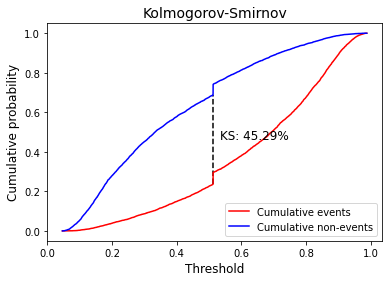

In [93]:
n_samples = y.shape[0]
n_event = np.sum(y)
n_nonevent = n_samples - n_event

idx = np.argsort(y_pred)
yy = y[idx]

cum_event = np.cumsum(yy)
cum_population = np.arange(1, y.shape[0]+1)
cum_nonevent = cum_population - cum_event

p_event = cum_event / n_event
p_nonevent = cum_nonevent / n_nonevent

p_diff = p_nonevent - p_event
ks_max_idx = np.argmax(p_diff)
ks_score = p_diff[ks_max_idx]


# Define the plot settings
title=None
xlabel=None
ylabel=None

if title is None:
    title = "Kolmogorov-Smirnov"
if xlabel is None:
    xlabel = "Threshold"
if ylabel is None:
    ylabel = "Cumulative probability"

plt.title(title, fontdict={'fontsize': 14})
plt.xlabel(xlabel, fontdict={'fontsize': 12})
plt.ylabel(ylabel, fontdict={'fontsize': 12})

plt.plot(pp, p_event, color="r", label="Cumulative events")
plt.plot(pp, p_nonevent, color="b", label="Cumulative non-events")

plt.vlines(pp[ks_max_idx], ymin=p_event[ks_max_idx],
           ymax=p_nonevent[ks_max_idx], color="k", linestyles="--")

# Set KS value inside plot
pos_x = pp[ks_max_idx] + 0.02
pos_y = 0.5 * (p_nonevent[ks_max_idx] + p_event[ks_max_idx])
text = "KS: {:.2%}".format(ks_score)
plt.text(pos_x, pos_y, text, fontsize=12, rotation_mode="anchor")

plt.legend(loc='lower right')

# plt.savefig(fname=fname, **kwargs)
# plt.close()
